# Sugeno

Com o método de inferência <em>Sugeno</em> implementado como na classe Sugeno, basta modelar os antecedentes e consequentes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from matplotlib import pyplot as plt

class Sugeno():

    def __init__(self, antecedents, consequents):
        #fiquei incomodado tmb quando percebi
        assert(len(consequents) == len(antecedents))
        self.consequents = consequents
        self.antecedents = antecedents

    def infer(self, x):
        weights = [ant.infer(x) for ant in self.antecedents]
        consequent_values = [con.infer(x) for con in self.consequents]

        output = 0
        for (w, cm) in zip(weights, consequent_values):
            output += w*cm

        normal_output = output/sum(weights)

        return normal_output

    def inferbycurve(self):
        weights = self.antecedents
        consequent_values = self.consequents

        output = 0
        for (w, cm) in zip(weights, consequent_values):
            output += w*cm

        normal_output = output/sum(weights)

        return normal_output

Será utilizada uma distribuição para a modelagem os antecedentes.

In [3]:
def gaussmf(x, c, sigma):
    mu = np.exp(-1 / 2 * ((x - c) / sigma) ** 2)
    return mu

Primeiro as váriaveis de entrada foram tratadas como uma variável apenas

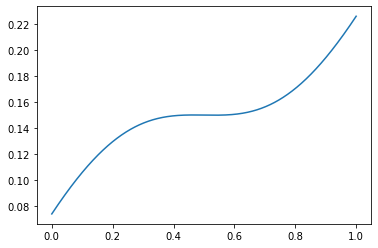

In [4]:
# x: food / service, y : tip
x = np.linspace(start = 0, stop = 1, num = 1000)

#antecedentes
lim = 0.35      #ajuste manual
ruim = gaussmf(x = x, c = 0, sigma = lim)
bom = gaussmf(x = x, c = 0.5, sigma = lim)
excelente = gaussmf(x = x, c = 1, sigma = lim)

#consequentes
p1 = (0.15 - 0.05) / 0.25
q1 = 0.05
y1 = p1 * x + q1

p2 = 0
q2 = 0.15
y2 = p2 * x + q2

p3 = (0.25 - 0.15) / 0.25
q3 = - 0.15
y3 = p3 * x + q3

#sugeno
ant = list([ruim, bom, excelente])
con = list([y1, y2, y3])

model = Sugeno(consequents = con, antecedents = ant)
yhat = model.inferbycurve()

plt.plot(x, yhat)

Agora, tratou-se as variáveis realmente como independentes. Para isso, os antecedentes das regras devem ser tratados com uma operação t-norm.

In [5]:
def tnorm(U, V):
    #min
    mesh = np.array(np.meshgrid(U, V))
    combinations = mesh.T.reshape(-1, 2)
    return np.amin(combinations, axis = 1)

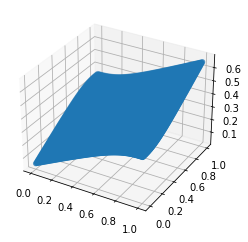

In [6]:
# x1, x2: food / service, y : tip
x1 = np.linspace(start = 0, stop = 1, num = 100)
x2 = np.linspace(start = 0, stop = 1, num = 100)

#antecedentes
#x1
lim = 0.35      #ajuste manual
ma = gaussmf(x = x1, c = 0, sigma = lim)
boa = gaussmf(x = x1, c = 0.5, sigma = lim)
deliciosa = gaussmf(x = x1, c = 1, sigma = lim)

#x2
lim = 0.35      #ajuste manual
ruim = gaussmf(x = x2, c = 0, sigma = lim)
bom = gaussmf(x = x2, c = 0.5, sigma = lim)
excelente = gaussmf(x = x2, c = 1, sigma = lim)

#consequentes
grid = np.array([(orde, absc) for orde in x1 for absc in x2])

p1 = (0.15 - 0.05) / 0.25
q1 = 0.05
y1 = p1 * (grid[:, 0] + grid[:, 1]) + q1

p2 = 0
q2 = 0.15
y2 = p2 * grid[:, 1] + q2

p3 = (0.25 - 0.15) / 0.25
q3 = - 0.15
y3 = p3 * (grid[:, 0] + grid[:, 1]) + q3


#sugeno
ant = list([tnorm(ruim, ma), 
            tnorm(bom, np.zeros(shape = deliciosa.shape)), 
            tnorm(excelente, deliciosa)])
con = list([y1, y2, y3])

model = Sugeno(consequents = con, antecedents = ant)
yhat = model.inferbycurve()

#plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(grid[:, 0], grid[:, 1], yhat)